In [1]:
import pandas as pd
chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

import TMQGP as tm
import QuarkTM

import matplotlib
matplotlib.style.use('publication')
import os

import h5py

from numpy import *

In [2]:
fname1 = './run2103/data_single_170.hdf5'
fname2 = '../FitChi2/4ch_XHI/0.00/data_single_170.hdf5'
# fname1 = '/home/const/Numerics/TMQGP/ipy/TMQGP/run/4ch_LO_old/170/iter_0.hdf5'
# fname1 = './iter_0.hdf5'

In [3]:
df1 = h5py.File(fname1)
df2 = h5py.File(fname2)

In [4]:
erange1 = df1.attrs['erange']
erange2 = df2.attrs['erange']

[]

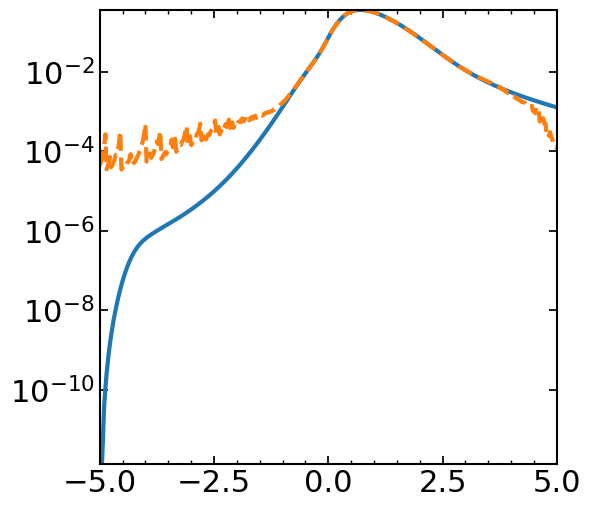

In [9]:
plt.plot(erange1, -imag(df1['Q']['S'][:, 0]))
plt.plot(erange2, -imag(df2['Q']['S'][:, 0]), ls='--')

plt.semilogy()

In [22]:
erange2b = df1.attrs['erange2b']

[]

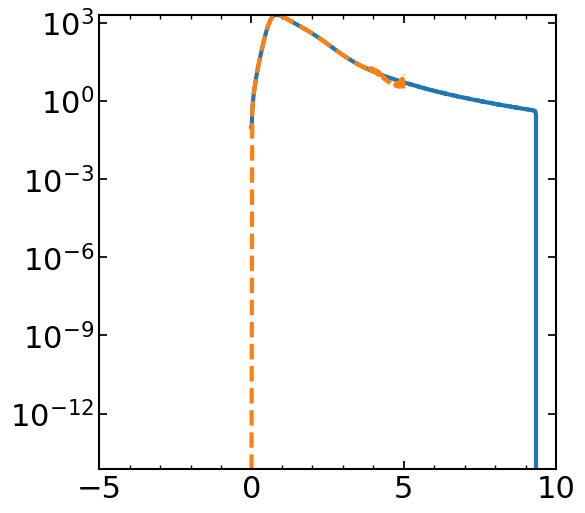

In [23]:
plt.plot(erange2b, -imag(df1['TM']['qa1']['0'][:, 0]))
plt.plot(erange2, -imag(df2['TM']['qa1']['0'][:, 0]), ls='--')

plt.semilogy()

# Check the thermodynamics

In [50]:
th1 = h5py.File('./run2103/th_data_single_170_2.hdf5')
th2 = h5py.File('../FitChi2/4ch_XHI/0.00/th_data_single_170.hdf5')

[]

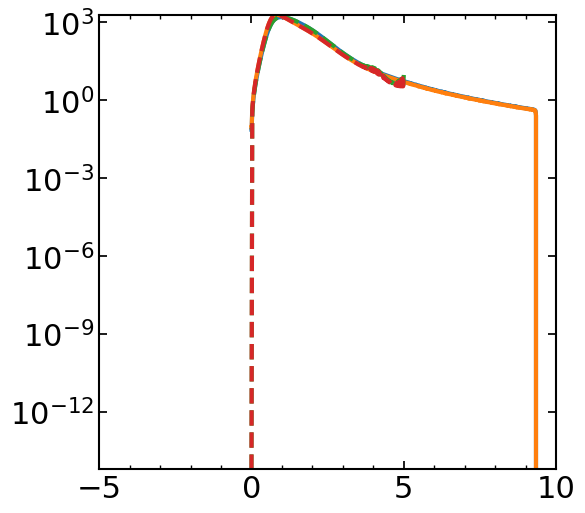

In [51]:
plt.plot(erange2b, -imag(th1['LogT']['qa1']['0'][:, 0]))
plt.plot(erange2b, -imag(df1['TM']['qa1']['0'][:, 0]))

plt.plot(erange2, -imag(th2['LogT']['qa1']['0'][:, 0]), ls='--')
plt.plot(erange2, -imag(df2['TM']['qa1']['0'][:, 0]), ls='--')

plt.semilogy()

In [52]:
th1['LogS'].keys()

<KeysViewHDF5 ['AA', 'AQ', 'QA', 'QQ']>

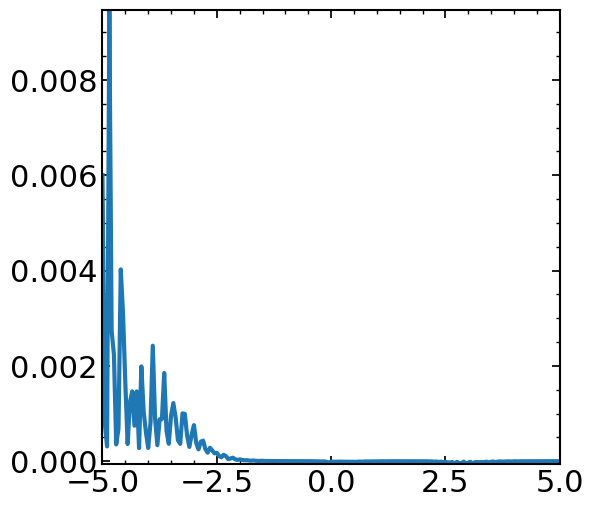

In [53]:
plt.plot(erange1, imag(th1['LogS']['QA'][:, 0]))

In [56]:
dict(th1.attrs)

{'P_Phi': array([-0.00231268]),
 'P_Phi_A': array([-0.00115634]),
 'P_Phi_G': array([0.]),
 'P_Phi_Q': array([-0.00115634]),
 'P_Q_A': array([0.00099355]),
 'P_Q_Q': array([0.00099355]),
 'P_S_A': array([-0.0008282]),
 'P_S_Q': array([-0.0008282]),
 'Ptot': array([-0.00198198])}

In [57]:
dict(th2.attrs)

{'P_Phi': array([0.00037562]),
 'P_Phi_A': array([0.00018781]),
 'P_Phi_G': array([0.]),
 'P_Phi_Q': array([0.00018781]),
 'P_Q_A': array([0.00102068]),
 'P_Q_Q': array([0.00102068]),
 'P_S_A': array([-0.00085079]),
 'P_S_Q': array([-0.00085079]),
 'Ptot': array([0.00071539])}

[]

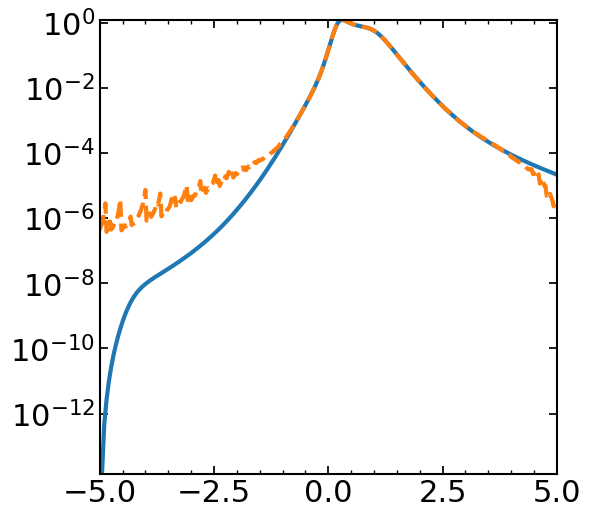

In [44]:
plt.plot(erange1, df1['Q']['R'][:, 0])
plt.plot(erange2, df2['Q']['R'][:, 0], ls='--')

plt.semilogy()

## Test calculation of Log S

In [60]:
qrange1 = df1.attrs['qrange']

In [62]:
pt = QuarkTM.Particle(df1.attrs['mQ'], qrange1, erange1, Gtab=array(df1['Q']['G']), S=array(df1['Q']['S']))